In [2]:
# Import libraries
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from libmadproject import *
%load_ext autoreload
%autoreload 2
# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

In [3]:
# Load the data
c = ['data2001.csv','data2002.csv','data2003.csv','data2004.csv','data2005.csv','data2006.csv','data2007.csv','data2008.csv','data2009.csv','data2010.csv','data2011.csv','data2012.csv','data2013.csv','data2014.csv','data2015.csv','data2016.csv','data2017.csv','data2018.csv','data2019.csv','datos202008.csv']
c = ['data/'+ i for i in c]
df_total = daily_airmad_varios_mu_m3(c)

# A bit of pre-processing to make it nicer
df_contamination = df_total.groupby('FECHA').mean()['Value'].reset_index()
df_contamination.columns = ['ds', 'y']


C:\Users\34653\Documents\Proyectos\QuarantineContaminationMadrid\libmadproject.py:568: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Value[pos] = df.Value[pos]*1000


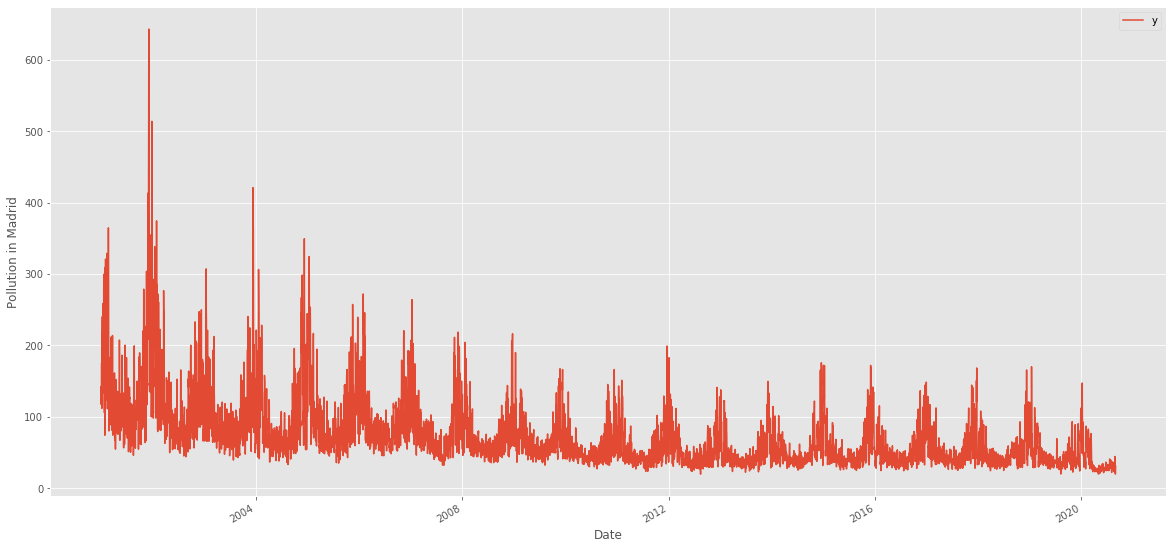

In [8]:
# Plot the data
df_contamination.set_index('ds').plot()
plt.ylabel('Pollution in Madrid')
plt.xlabel('Date')
plt.show()

In [9]:
# Define the d and q parameters to take any value between 0 and 1
q = d = range(0, 2)
# Define the p parameters to take any value between 0 and 3
p = range(0, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [25]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1),
 (2, 0, 0),
 (2, 0, 1),
 (2, 1, 0),
 (2, 1, 1),
 (3, 0, 0),
 (3, 0, 1),
 (3, 1, 0),
 (3, 1, 1)]

In [26]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (3, 0, 0, 12),
 (3, 0, 1, 12),
 (3, 1, 0, 12),
 (3, 1, 1, 12)]

In [4]:
df_prediction = df_contamination[(df_contamination.ds >= '2008-01-01') & (df_contamination.ds <= '2020-03-14')]
df_test = df_contamination[(df_contamination.ds >= '2020-03-14')]
train_df = df_prediction

In [5]:
train_df.set_index('ds', inplace=True)

In [28]:
# warnings.filterwarnings("ignore") # specify to ignore warning messages

AIC = []
SARIMAX_model = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            

            results = mod.fit()

            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic), end='\r')
            AIC.append(results.aic)
            SARIMAX_model.append([param, param_seasonal])
        except:
#             print('hola')
            continue

hola
holaMAX(0, 0, 0)x(0, 0, 0, 12) - AIC:49227.629592453864
holaMAX(0, 0, 0)x(0, 0, 1, 12) - AIC:46252.694589177954
holaMAX(0, 0, 0)x(0, 1, 0, 12) - AIC:42785.02504095207
holaMAX(0, 0, 0)x(0, 1, 1, 12) - AIC:40730.48989224579
holaMAX(0, 0, 0)x(1, 0, 0, 12) - AIC:42512.22725377466
holaMAX(0, 0, 0)x(1, 0, 1, 12) - AIC:40856.08220486368
holaMAX(0, 0, 0)x(1, 1, 0, 12) - AIC:41388.0005971989
holaMAX(0, 0, 0)x(1, 1, 1, 12) - AIC:40731.17570056589
holaMAX(0, 0, 0)x(2, 0, 0, 12) - AIC:41276.68339711396
holaMAX(0, 0, 0)x(2, 0, 1, 12) - AIC:40726.98515471938
holaMAX(0, 0, 0)x(2, 1, 0, 12) - AIC:40743.863273591705
holaMAX(0, 0, 0)x(2, 1, 1, 12) - AIC:40572.186374582845
holaMAX(0, 0, 0)x(3, 0, 0, 12) - AIC:40679.16689170532
holaMAX(0, 0, 0)x(3, 0, 1, 12) - AIC:40540.845217687645
holaMAX(0, 0, 0)x(3, 1, 0, 12) - AIC:40496.01530563658
holaMAX(0, 0, 0)x(3, 1, 1, 12) - AIC:40444.143152360964
holaMAX(0, 0, 1)x(0, 0, 0, 12) - AIC:44594.75131705977
holaMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:42511.05816191215


holaMAX(2, 0, 1)x(1, 0, 1, 12) - AIC:37639.5979574536
holaMAX(2, 0, 1)x(1, 1, 0, 12) - AIC:38679.3299731588
holaMAX(2, 0, 1)x(1, 1, 1, 12) - AIC:37106.35699184397
holaMAX(2, 0, 1)x(2, 0, 0, 12) - AIC:37482.9701935996
holaMAX(2, 0, 1)x(2, 0, 1, 12) - AIC:37484.39974095394
holaMAX(2, 0, 1)x(2, 1, 0, 12) - AIC:37900.78135329268
holaMAX(2, 0, 1)x(2, 1, 1, 12) - AIC:36953.96942452103
holaMAX(2, 0, 1)x(3, 0, 0, 12) - AIC:37313.70381138177
holaMAX(2, 0, 1)x(3, 0, 1, 12) - AIC:37317.02193236539
holaMAX(2, 0, 1)x(3, 1, 0, 12) - AIC:37501.05706834871
holaMAX(2, 0, 1)x(3, 1, 1, 12) - AIC:36799.901350086366
holaMAX(2, 1, 0)x(0, 0, 0, 12) - AIC:37546.88759282946
holaMAX(2, 1, 0)x(0, 0, 1, 12) - AIC:37408.56520138242
holaMAX(2, 1, 0)x(0, 1, 0, 12) - AIC:40879.378693189385
holaMAX(2, 1, 0)x(0, 1, 1, 12) - AIC:37403.315882134084
holaMAX(2, 1, 0)x(1, 0, 0, 12) - AIC:37406.879243638454
holaMAX(2, 1, 0)x(1, 0, 1, 12) - AIC:37384.0254289153
holaMAX(2, 1, 0)x(1, 1, 0, 12) - AIC:39401.61613387098
holaMAX(2,

In [29]:

print('The smallest AIC is {} for model SARIMAX{}x{}'.format(min(AIC), SARIMAX_model[AIC.index(min(AIC))][0],SARIMAX_model[AIC.index(min(AIC))][1]))

The smallest AIC is 36507.34940891432 for model SARIMAX(3, 0, 1)x(3, 1, 1, 12)


In [6]:
param = (3, 0, 1)
param_seasonal = (3, 1, 1, 12)
mod = sm.tsa.statespace.SARIMAX(train_df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

C:\Users\34653\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\34653\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [7]:
results = mod.fit()

C:\Users\34653\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
pred0 = results.get_prediction(start='2020-03-15', end = '2020-06-23',dynamic=False)
pred0_ci = pred0.conf_int()


In [18]:
data_q = df_contamination[(df_contamination.ds >= '2020-03-15') & (df_contamination.ds <= '2020-06-23')][['ds','y']]

In [20]:
data_q.set_index('ds', inplace = True)

In [32]:
data_q

,y
ds,
2020-03-15,28.235379
2020-03-16,26.580205
2020-03-17,28.455578
2020-03-18,37.024189
2020-03-19,30.522703
...,...
2020-06-19,27.829470
2020-06-20,28.642384
2020-06-21,28.272384


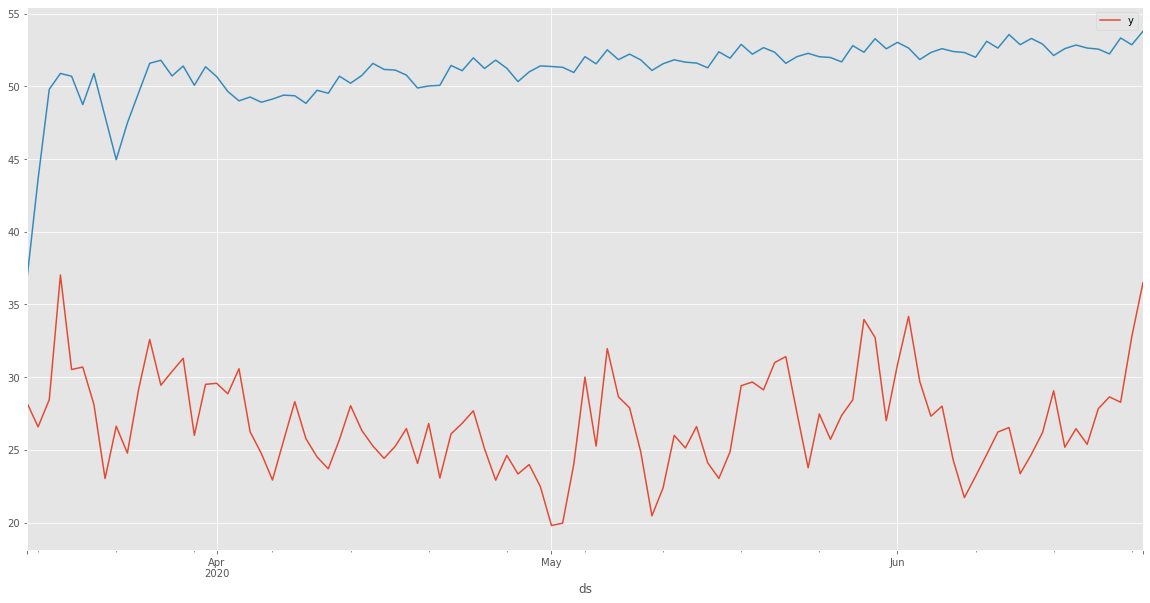

In [25]:
ax = data_q.plot()
pred0.predicted_mean.plot(ax = ax)
plt.show()

In [29]:
pred_uc_ci = pred0.conf_int()

In [43]:
data_q['predicted_mean'] = pred0.predicted_mean

In [44]:
((data_q['predicted_mean']-data_q['y'])/data_q['y']).mean()*100

92.37251025007143

### How much has the contamination dropped due to the quarantine compared to what was expected?

In [45]:
#92%